In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
from pylab import rcParams 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [258]:
from prophet import Prophet

In [259]:
data = pd.read_csv('c://users//cmaposah//downloads//Time_series_analysis_and_forecast_DATASET.csv')
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


#### convert column to datetime

In [260]:
data[ "FullDate" ] = pd.to_datetime(data[ "FullDate" ]) 

#### check for null values

In [261]:
data.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

#### Using the daily sampling rate (sum)

In [262]:
data=data.resample('D', on='FullDate').sum()

#### creating a backup copy

In [263]:
data1 = data.copy()

#### checking the shape and data types of the resampled data

In [264]:
data1.shape

(3834, 4)

In [265]:
data1.dtypes

Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [266]:
data1.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


##### Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

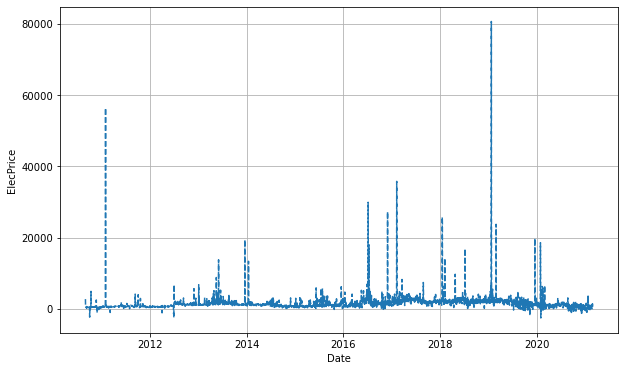

In [267]:
#data1.set_index( "FullDate", inplace= True )
plt.figure(figsize=(10,6))
plt.plot(data1.index, data1.ElecPrice, '--'  )
plt.grid()
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.show()

In [268]:
data1 = data1.reset_index()

#### Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [269]:
adf_result = adfuller(data1['SysLoad'])

In [270]:
adf_result

(-3.690158988836651,
 0.00425372550457405,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [271]:
print(f'p-value: {round(adf_result[1],6)}')

p-value: 0.004254


In [272]:
adf_result1 = adfuller(data1['GasPrice'])

In [273]:
print(f'p-value: {round(adf_result1[1],6)}')

p-value: 0.045027


In [274]:
print(f'the P-value of the SysLoad and GasPrice: {round(adf_result[1],6),round(adf_result1[1],6)}')

the P-value of the SysLoad and GasPrice: (0.004254, 0.045027)


#### Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [275]:
adf_gas = adfuller(data1['GasPrice'])

In [276]:
adf_gas 

(-2.902766697165178,
 0.04502721288462563,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [277]:
round(adf_gas[4]['5%'],4)

-2.8623

In [278]:
adf_elec = adfuller(data1['ElecPrice'])

In [279]:
adf_elec 

(-8.269053866873824,
 4.848817773711018e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

In [280]:
print(f"The 10% & 5% critical values of the GasPrice and ElecPrice: {round(adf_gas[4]['10%'],4),round(adf_elec[4]['5%'],4)}")

The 10% & 5% critical values of the GasPrice and ElecPrice: (-2.5672, -2.8623)


In [281]:
data1.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [282]:
data1 = data1.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
data1.drop(['Tmax','SysLoad','GasPrice'], axis=1, inplace=True)
data1.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [283]:
training = data1.iloc[:2757, :]
testing = data1.iloc[2757:, :]
print(training.shape)
print(testing.shape)
#testing.reset_index(drop=True, inplace=True)

(2757, 2)
(1077, 2)


In [285]:
m = Prophet()
model = m.fit(training) 

10:14:45 - cmdstanpy - INFO - Chain [1] start processing
10:14:47 - cmdstanpy - INFO - Chain [1] done processing


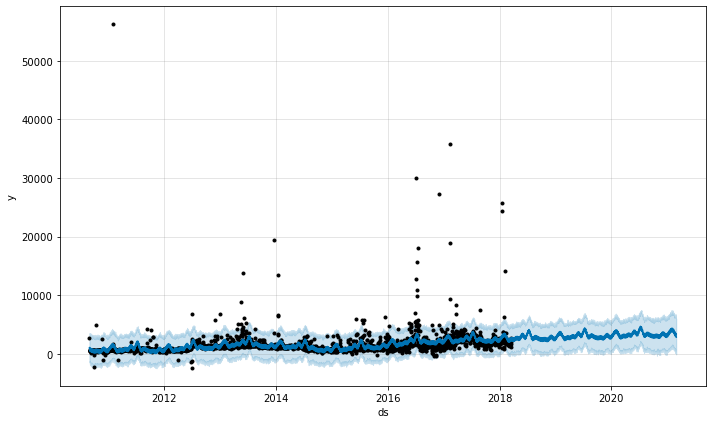

In [286]:
#predict for the same period as the test set
future = model.make_future_dataframe(periods= len(testing) , freq ='D' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
model.plot(forecast)
plt.show() 

In [287]:
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


#### concatenate the future DF with the actual y results

In [288]:
future  = pd.concat([future,data1.loc[:,'y']], axis=1)

In [289]:
future

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


#### If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value

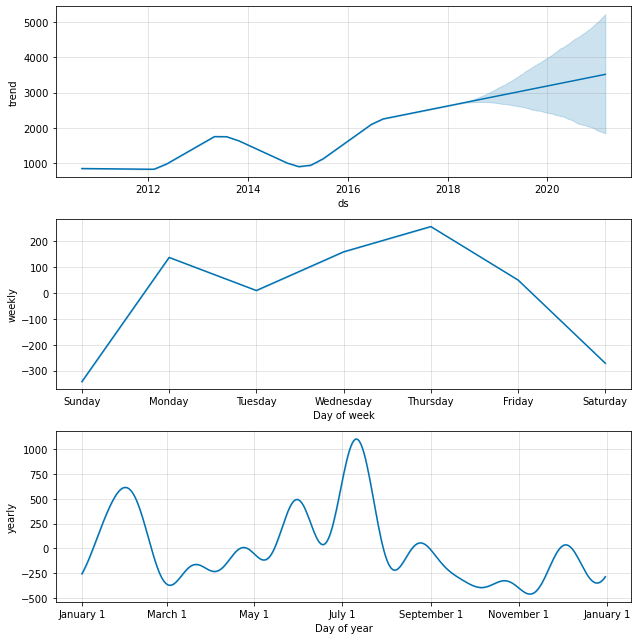

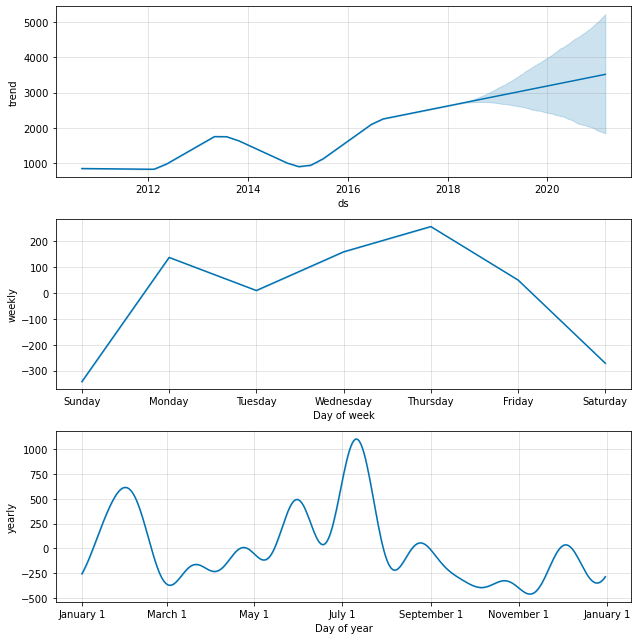

In [290]:
m.plot_components(forecast)

In [291]:
print(f'what month of the yearly seasonality has the highest value?',{'July'})

what month of the yearly seasonality has the highest value? {'July'}


In [292]:
forecast[['ds','yhat']]

,ds,yhat
0,2010-09-01,993.413256
1,2010-09-02,1073.660989
2,2010-09-03,848.555874
3,2010-09-04,508.156369
4,2010-09-05,418.118994
...,...,...
3829,2021-02-24,3420.990463
3830,2021-02-25,3487.847025
3831,2021-02-26,3254.630100
3832,2021-02-27,2911.256585


In [294]:
forecast.iloc[-1077:,-1:]

,yhat
2757,2524.640796
2758,2677.878229
2759,2776.819117
2760,2568.874622
2761,2244.009904
...,...
3829,3420.990463
3830,3487.847025
3831,3254.630100
3832,2911.256585


#### Concatenate the testing DF with the actual and predicted y values

In [295]:
df1= pd.concat([testing, forecast.iloc[-1077:,-1:]], axis=1)

In [296]:
df1.head()

,ds,y,yhat
2757,2018-03-20,1833.00,2524.640796
2758,2018-03-21,1730.49,2677.878229
2759,2018-03-22,2260.55,2776.819117
2760,2018-03-23,2138.76,2568.874622
2761,2018-03-24,1721.70,2244.009904


In [297]:
df1.tail()

,ds,y,yhat
3829,2021-02-24,634.770,3420.990463
3830,2021-02-25,577.515,3487.847025
3831,2021-02-26,1445.495,3254.630100
3832,2021-02-27,488.980,2911.256585
3833,2021-02-28,-98.985,2823.176966


#### Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [298]:
round(np.mean(np.abs((df1.y - df1.yhat) / df1.y)) * 100,2)

540.82

#### What is the RMSE in 2 decimal places?

In [299]:
mse = mean_squared_error(df1.y, df1.yhat)
rmse = sqrt(mse)
print(f'RMSE: {round(rmse,2)}')

RMSE: 3200.06


### Multivariate Time Series Forecasting with Facebook Prophet

#### Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [300]:
data.shape

(3834, 4)

In [301]:
data = data.reset_index()
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [302]:
data = data.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
data.head(1)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38,88.56,2751.7


##### Spliting the data into train and test

In [314]:
training = data.iloc[:2757, :]
testing = data.iloc[2757:, :]

In [315]:
testing.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [317]:
m = Prophet()
m.add_regressor('Tmax')
m.add_regressor('SysLoad')
m.add_regressor('GasPrice')
model = m.fit(training)

10:26:05 - cmdstanpy - INFO - Chain [1] start processing
10:26:06 - cmdstanpy - INFO - Chain [1] done processing


In [318]:
future = model.make_future_dataframe(periods=len(testing), freq='D')
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [320]:
future  = pd.concat([future,data.iloc[:,1:4]], axis=1)

In [321]:
forecast = model.predict(future)

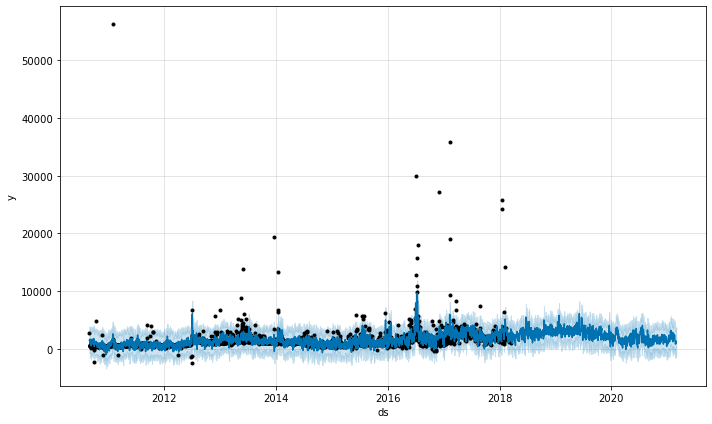

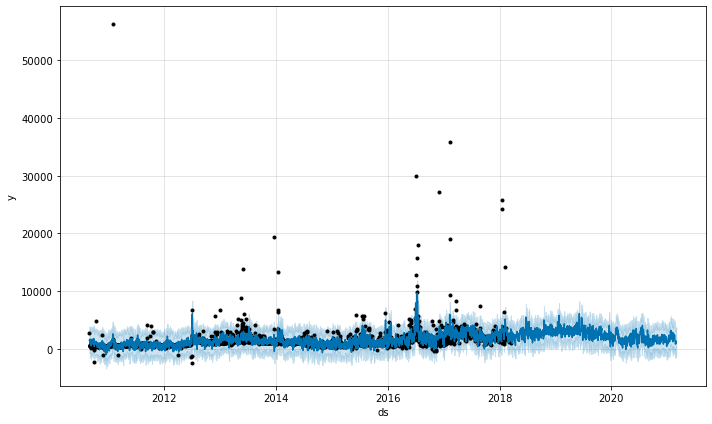

In [322]:
model.plot(forecast)

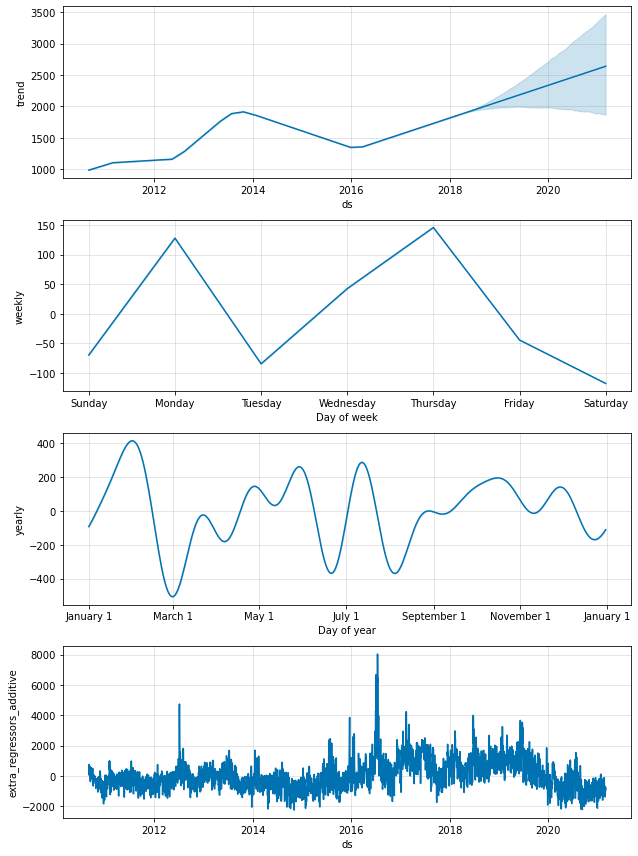

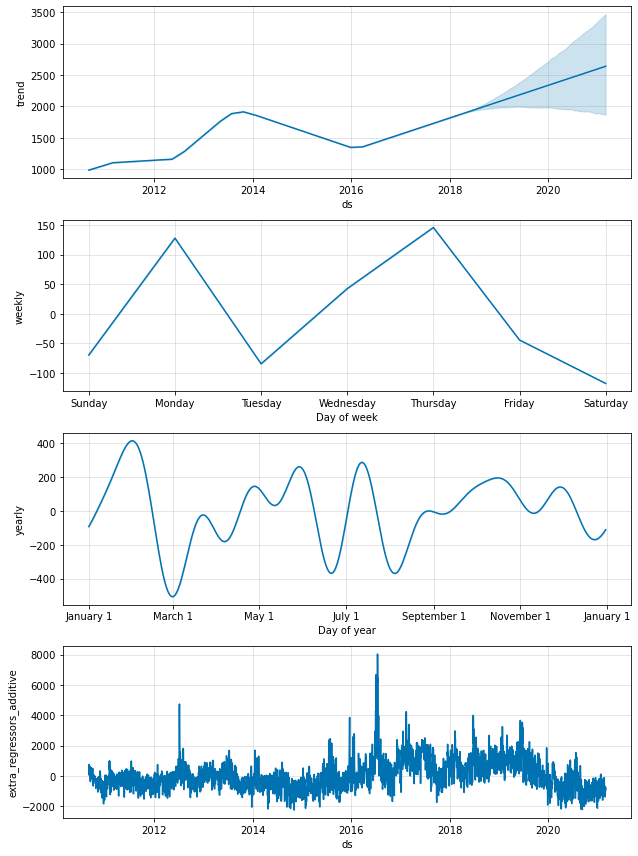

In [323]:
model.plot_components(forecast)

In [324]:
df2= pd.concat([testing, forecast.iloc[-1077:,-1:]], axis=1)

In [325]:
df2.head() 

,ds,Tmax,SysLoad,GasPrice,y,yhat
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00,1996.071292
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49,1987.607771
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55,2907.703175
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76,2591.965357
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70,1445.110328


In [326]:
df2.tail()

,ds,Tmax,SysLoad,GasPrice,y,yhat
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770,987.557096
3830,2021-02-25,518.4,4539.07855,130.5048,577.515,1347.041876
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495,1410.773519
3832,2021-02-27,564.0,4932.88015,130.0800,488.980,1065.697694
3833,2021-02-28,583.2,6675.05485,131.6352,-98.985,1226.111699


#### Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [327]:
round(np.mean(np.abs((df2.y - df2.yhat) / df2.y)) * 100,2)

236.6

#### What is the RMSE in 2 decimal places?

In [328]:
mse = mean_squared_error(df2.y, df2.yhat)
rmse = sqrt(mse)
print(f'RMSE: {round(rmse,2)}')

RMSE: 2712.72


#### If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

In [329]:
print(f"The answer is {'THURSDAY'}" )

The answer is THURSDAY


#### Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [330]:
data.drop(['Tmax'], axis=1, inplace=True)
data.head()

,ds,SysLoad,GasPrice,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [331]:
training = data.iloc[:2757, :]
testing = data.iloc[2757:, :]

In [332]:
m = Prophet()
m.add_regressor('SysLoad')
m.add_regressor('GasPrice')
m.fit(training)

10:29:33 - cmdstanpy - INFO - Chain [1] start processing
10:29:33 - cmdstanpy - INFO - Chain [1] done processing


In [333]:
future = m.make_future_dataframe(periods=len(testing), freq='D')
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [335]:
future = pd.concat([future,data.iloc[:,1:4]], axis=1)
future

,ds,SysLoad,GasPrice,y
0,2010-09-01,41565.38000,88.5600,2751.700
1,2010-09-02,38898.99000,88.5600,570.810
2,2010-09-03,41665.76000,106.8000,504.975
3,2010-09-04,35638.08500,81.3600,502.275
4,2010-09-05,35611.41000,106.8000,500.555
...,...,...,...,...
3829,2021-02-24,-1525.49745,134.4000,634.770
3830,2021-02-25,4539.07855,130.5048,577.515
3831,2021-02-26,9517.02430,130.1808,1445.495
3832,2021-02-27,4932.88015,130.0800,488.980


In [336]:
forecast = m.predict(future)

In [337]:
df3=pd.concat([testing, forecast.iloc[-1077:,-1:]], axis=1)

In [338]:
df3.head()

,ds,SysLoad,GasPrice,y,yhat
2757,2018-03-20,7696.91130,201.5880,1833.00,1983.671816
2758,2018-03-21,4658.05865,203.2560,1730.49,1974.986159
2759,2018-03-22,19161.78525,203.2560,2260.55,2894.805949
2760,2018-03-23,18090.43435,198.6456,2138.76,2579.514951
2761,2018-03-24,3763.53865,180.2160,1721.70,1431.907783


In [339]:
df3.tail()

,ds,SysLoad,GasPrice,y,yhat
3829,2021-02-24,-1525.49745,134.4000,634.770,945.329740
3830,2021-02-25,4539.07855,130.5048,577.515,1304.569130
3831,2021-02-26,9517.02430,130.1808,1445.495,1369.122847
3832,2021-02-27,4932.88015,130.0800,488.980,1023.551243
3833,2021-02-28,6675.05485,131.6352,-98.985,1184.671661


#### What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [340]:
round(np.mean(np.abs((df3.y - df3.yhat) / df3.y)) * 100,2)

230.1